In [ ]:
import pandas as pd
# Import bigrams
from nltk import bigrams
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## First extract useful ASIN numbers from the meta data file

In [ ]:
# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 10000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json("meta_CDs_and_Vinyl.json.gz", compression='gzip', nrows=100000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
meta = pd.concat(myList,axis=0)

In [ ]:
# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 10000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('CDs_and_Vinyl_5.json.gz', compression='gzip', nrows=100000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
df = pd.concat(myList,axis=0)

In [ ]:
asin_no = df["asin"]

In [ ]:
subset_meta = meta[meta["asin"].isin(asin_no)]

In [ ]:
def extract_category(category_list):
  try:
    return category_list[1]
  except IndexError:
    return None

subset_meta["category_split"] = subset_meta["category"].apply(extract_category)

<ipython-input-9-526a7fd6db1f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_meta["category_split"] = subset_meta["category"].apply(extract_category)


In [ ]:
subset_meta["category_split"].value_counts()

category_split
Pop                        531
Alternative Rock           527
Classic Rock               417
Classical                  355
Rock                       338
R&B                        257
World Music                227
Jazz                       216
Country                    215
Blues                      175
Dance & Electronic         167
Opera & Classical Vocal    156
Soundtracks                108
Broadway & Vocalists       106
Metal                       85
Folk                        81
Christian                   68
Rap & Hip-Hop               45
New Age                     43
Comedy & Spoken Word        36
Holiday & Wedding           24
Children's Music            16
Latin Music                 16
Gospel                       7
Special Interest             6
Reggae                       6
Name: count, dtype: int64

In [ ]:
subset_meta = subset_meta.dropna(subset=["category_split"])

In [ ]:
subset_meta

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details,category_split
0,"[CDs & Vinyl, Christian]",,[],,Songs for the Shepherd,"[B0016CP2GS, B0000075PB, B0000275QQ, B00000I7J...",,Keith Green,[],"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,0001393774,[],[],NaN,Christian
5,"[CDs & Vinyl, Holiday & Wedding]",,"[This is a concept album all the way, with tal...",,Christmas Eve and Other Stories,"[B01M0L3X65, B07G1V9Q3X, B00000AEDW, B0002ZDVG...",,Trans-Siberian Orchestra,[],73 in CDs & Vinyl (,"[B01M0L3X65, B07G1V9Q3X, B0002ZDVGS, B00000AED...","<img src=""https://images-na.ssl-images-amazon....",,,$5.98,0005164885,[],[],NaN,Holiday & Wedding
6,"[CDs & Vinyl, Christian, Pop & Contemporary]",,"[1. Jesus Lord Of The Way I Feel, 2. Jehoshaph...",,Forgiven,"[B000025Q0M, B003H8F4NA, B003ZFVHPO, B003JMP1Z...",,Don Francisco,[],"369,849 in CDs & Vinyl (","[B003H8F4NA, B000025Q0M, B003JMP1ZK, 076013588...","<img src=""https://images-na.ssl-images-amazon....",,,,0005465079,[],[],NaN,Christian
33,"[CDs & Vinyl, Classic Rock, British Invasion]",,"[""Hullabaloo"" featured the most popular rock '...",,"Hullabaloo, Vols. 1-4","[B00005AVZQ, B00005YTR7, B07HFYZY7D, B01LX9D4S...",,Patrick Adiarte,[],"141,587 in Movies & TV (","[B00CQRNM32, B00CQRNMM8, B00CQRNM0A, B00CQRNM0...",Movies & TV,,,,0788602144,[],[],NaN,Classic Rock
59,"[CDs & Vinyl, Christian, Pop & Contemporary]",,[run time 78 minAn accident or an illness---an...,,Escape from Hell,"[0967680670, 0967680689, B001AYJ2Y0, B00REG9GE...",,Daniel Kruse,[],"48,283 in Movies & TV (","[B00097E6NQ, 5559921017, 0967680670, 096768068...",Movies & TV,,,$9.85,0967680654,[],[],NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22406,"[CDs & Vinyl, Blues, Regional Blues, Texas Blues]",,[],,Couldn't Stand the Weather,[],,Stevie Ray Vaughan,[],"801,190 in CDs & Vinyl (","[B01M8QXANC, B00CIOG4P6, B0054YH7YO, B01IB6Q1M...","<img src=""https://images-na.ssl-images-amazon....",,NaN,,B0000025ZO,[],[],"{'Audio Cassette': '(June 4, 1984)', 'Number o...",Blues
22411,"[CDs & Vinyl, Classic Rock, Southern Rock]",,[],,Deed Is Done,"[B019GTOJJI, B000007Q9E, B000003H3J, B000008IJ...",,Molly Hatchet,[],"532,493 in CDs & Vinyl (","[B019GTOJJI, B0000025IW, B00005NBZB, B0012GMVP...","<img src=""https://images-na.ssl-images-amazon....",,NaN,,B00000261W,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Classic Rock
22416,"[CDs & Vinyl, Classic Rock, Album-Oriented Roc...",,[1988 release following an eight year hiatus -...,,Other Roads,"[B07CXC3312, B003X43FT8, B000NQQ4QK, B000000W5...",,Boz Scaggs,[],"465,651 in CDs & Vinyl (","[B07CXC3312, B00CIOFWBS, B000NQQ4QK, B000002I9...","<img src=""https://images-na.ssl-images-amazon....",,NaN,$22.95,B000002686,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Classic Rock
22459,"[CDs & Vinyl, Broadway & Vocalists, Musicals]",,[[Note: This product is an authorized CD-R and...,,Dave Brubeck Quartet Plays Music From West Sid...,"[B00000274T, B00005AWMW, B005JC1YR2, B00008NGA...",,West Side Story (Related Recordings),[],"242,410 in CDs & Vinyl (","[B00008NGAF, B004GE80Z8, B000000Y2Z, B00005AWM...","<img src=""https://images-na.ssl-images-amazon....",,NaN,$11.98,B000002680,[],[],"{'Audio CD': '(December 16, 2009)', 'Number of...",Broadway & Vocalists


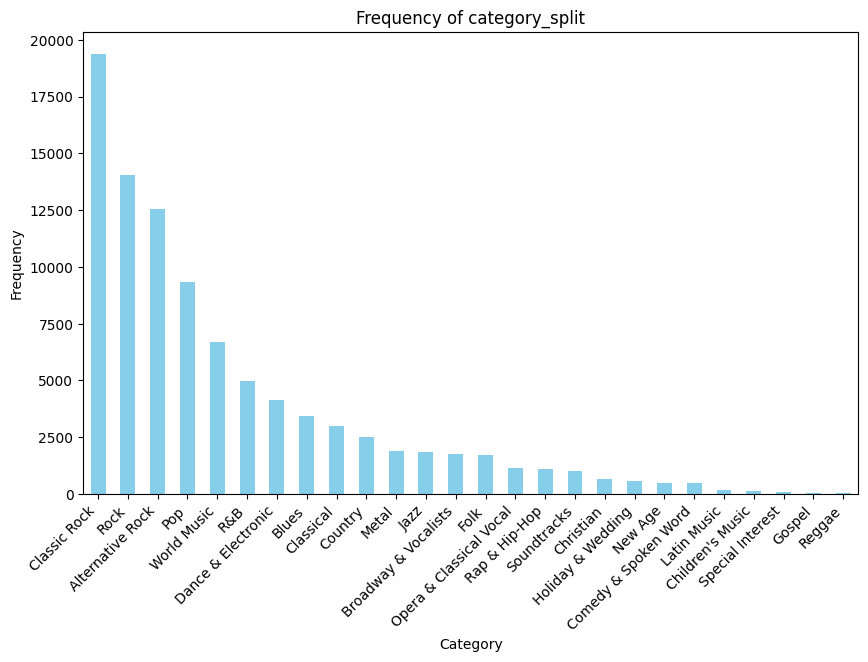

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of category_split frequency
plt.figure(figsize=(10, 6))
main_df['category_split'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of category_split')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()


<ipython-input-41-68d4b91ba723>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  main_df_2018 = final_df_1[main_df['reviewTime'].str.contains('2018')]


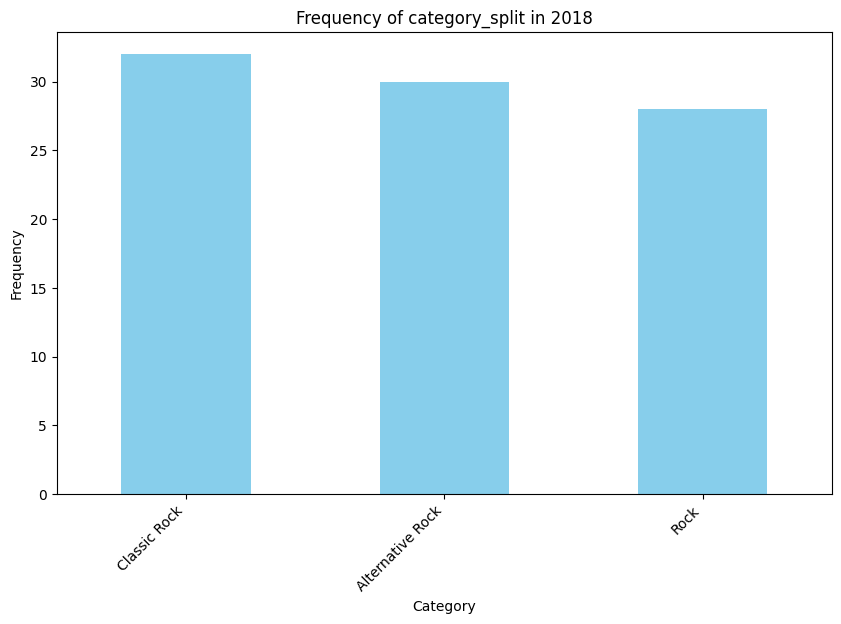

In [ ]:
import matplotlib.pyplot as plt

# Filter DataFrame for the year 2018
main_df_2018 = final_df_1[main_df['reviewTime'].str.contains('2018')]

# Plot histogram of category_split frequency for 2018
plt.figure(figsize=(10, 6))
main_df_2018['category_split'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Frequency of category_split in 2018')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(False)
plt.show()


In [ ]:
import numpy as np

# Define conditions for sentiment
conditions = [
    (main_df['overall'] >= 4),
    (main_df['overall'] <= 2)
]

# Define values for each condition
values = ['positive', 'negative']

# Assign 'neutral' for other cases
main_df['sentiment'] = np.select(conditions, values, default='neutral')

In [ ]:
main_df= pd.merge (df, subset_meta, on = "asin", how="inner")

In [ ]:
subset_meta = subset_meta.dropna(subset=["category_split"])

subset_category = subset_meta[subset_meta["category_split"].str.contains("Classic Rock|Rock|AlternativeRock", case=False)]

In [ ]:
final_df_1= pd.merge (df, subset_category, on = "asin", how="inner")

In [ ]:
main_df

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,...,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,category_split
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5,"04 29, 2016",Five Stars,1461888000,NaN,...,"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,[],[],NaN,Christian
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,...,"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,[],[],NaN,Christian
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5,"02 11, 2016",Five Stars,1455148800,NaN,...,"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,[],[],NaN,Christian
3,A3478QRKQDOPQ2,0001393774,jacki,True,I recall loving his other albums and maybe thi...,5,"11 28, 2015",forgot but I figured on some of these artists ...,1448668800,NaN,...,"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,[],[],NaN,Christian
4,A23M5VTSN2C3H1,0001393774,Caliope,True,Keith Green was a pioneer in the field of Chri...,5,"12 16, 2014",and I have loved every album he did,1418688000,NaN,...,"123,896 in CDs & Vinyl (","[B0016CP2GS, B00000I7JO, B00000I9AH, B00P826ZR...","<img src=""https://images-na.ssl-images-amazon....",,,,[],[],NaN,Christian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93074,AFJFXN42RZ3G2,B00000265A,R. DelParto,False,Where would Christmas be without the Ray Conni...,5,"11 29, 2006",Childhood Christmas Memories,1164758400,{'Format:': ' Audio CD'},...,"105,657 in CDs & Vinyl (","[B0000024RK, B0000024QR, B003O5MONO, B003U8G5Q...","<img src=""https://images-na.ssl-images-amazon....",,NaN,,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Pop
93075,A1GIIPXONCEEHP,B00000265A,Steve Vrana,False,Growing up in the Sixties my dad's Christmas m...,4,"11 26, 2000",Christmas Music From My Childhood,975196800,{'Format:': ' Audio CD'},...,"105,657 in CDs & Vinyl (","[B0000024RK, B0000024QR, B003O5MONO, B003U8G5Q...","<img src=""https://images-na.ssl-images-amazon....",,NaN,,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Pop
93076,AMBUXXDY50MB,B000002698,Ribera C,True,"Totally love this Dic Set, thank you.",5,"04 13, 2018",Awesome,1523577600,{'Format:': ' Audio CD'},...,"1,832,380 in CDs & Vinyl (","[B00HG30CD4, B01C81PENQ, B006QR28HE, B000003N7...","<img src=""https://images-na.ssl-images-amazon....",,NaN,,[],[],{'ASIN:': 'B000002698'},Jazz
93077,A11KNM3FWS6D8C,B000002698,Fernando Espinola,True,"have a scraches, the track 4 don't play",3,"03 29, 2018",Three Stars,1522281600,{'Format:': ' Audio CD'},...,"1,832,380 in CDs & Vinyl (","[B00HG30CD4, B01C81PENQ, B006QR28HE, B000003N7...","<img src=""https://images-na.ssl-images-amazon....",,NaN,,[],[],{'ASIN:': 'B000002698'},Jazz


In [ ]:
columns_to_drop = ["details","reviewerID", "reviewerName", "unixReviewTime", "vote","tech1","tech2", "fit","summary","date","similar_item","imageURL","imageURLHighRes","style","main_cat","image","rank","category"]
final_df_1= final_df_1.drop(columns=columns_to_drop)

In [ ]:
columns_to_drop = ["title","also_buy", "also_view", "verified","feature"]
final_df_1= final_df_1.drop(columns=columns_to_drop)

In [ ]:
final_df_1

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,...,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details,category_split
0,A2YCGMW0ZKPYZ2,0788602144,Bernard Perusse,True,"The answer, of course, is no. A lot of time ha...",4,"07 8, 2002",Nostalgia: overrated?,1026086400,{'Format:': ' DVD'},...,"141,587 in Movies & TV (","[B00CQRNM32, B00CQRNMM8, B00CQRNM0A, B00CQRNM0...",Movies & TV,,,,[],[],NaN,Classic Rock
1,A2XFRYFB5CVH2G,0788602144,Skip,False,"I initially bought Vol 3 on VHS, because I'd n...",5,"05 15, 2002",Aaah...the 60's,1021420800,{'Format:': ' DVD'},...,"141,587 in Movies & TV (","[B00CQRNM32, B00CQRNMM8, B00CQRNM0A, B00CQRNM0...",Movies & TV,,,,[],[],NaN,Classic Rock
2,A11X3W1Y5XRTCK,0788602144,DrDanny,False,I'm probably dead center in the target age ran...,4,"10 19, 2000",A real trip down memory lane (with white vinyl...,971913600,{'Format:': ' DVD'},...,"141,587 in Movies & TV (","[B00CQRNM32, B00CQRNMM8, B00CQRNM0A, B00CQRNM0...",Movies & TV,,,,[],[],NaN,Classic Rock
3,A2WJSVSBXEYEF,1566054109,Jefferson T. Packer,False,"I was newly sixteen when Pat did this concert,...",4,"04 17, 2000",A Moment of Real Rock in the era of Too Much K...,955929600,{'Format:': ' VHS Tape'},...,"510,711 in Movies & TV (",[],Movies & TV,,,,[],[],NaN,Classic Rock
4,AJEOAE62QE5Y1,1566054109,Gerald B. Johnson,False,"I'm not really a big Pat Benatar fan, but I ca...",4,"02 11, 2000",This is the real stuff,950227200,{'Format:': ' DVD'},...,"510,711 in Movies & TV (",[],Movies & TV,,,,[],[],NaN,Classic Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45956,A1EEDHQLN62ZO5,B0000025VU,Gregory K. Tobkes,True,Bob Dylan is the song writer with chameleon DN...,5,"01 30, 2013",Still Going Strong,1359504000,{'Format:': ' Audio CD'},...,"471,948 in CDs & Vinyl (","[B00026WU6O, B00026WU50, B0012GN490, B0741W6H1...","<img src=""https://images-na.ssl-images-amazon....",,NaN,$2.99,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Classic Rock
45957,A32W4INC8OK9Q,B0000025VU,Marcia,True,"If you are a Dylan fan, this is a must have. ...",5,"11 23, 2012",Bob Dylan - What More Needs to be Said(?),1353628800,{'Format:': ' Audio CD'},...,"471,948 in CDs & Vinyl (","[B00026WU6O, B00026WU50, B0012GN490, B0741W6H1...","<img src=""https://images-na.ssl-images-amazon....",,NaN,$2.99,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Classic Rock
45958,A2PB0L2OSQR9ZX,B0000025VU,Bjorn,True,He never disappoints-even my 19 year old son a...,5,"11 23, 2012",Bob Dylan is a genius,1353628800,{'Format:': ' Audio CD'},...,"471,948 in CDs & Vinyl (","[B00026WU6O, B00026WU50, B0012GN490, B0741W6H1...","<img src=""https://images-na.ssl-images-amazon....",,NaN,$2.99,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Classic Rock
45959,A1Z143BPDS2XXC,B0000025VU,Milly,True,I like all of hsi music...some a little more o...,5,"09 30, 2012",Infidels - impression,1348963200,{'Format:': ' Audio CD'},...,"471,948 in CDs & Vinyl (","[B00026WU6O, B00026WU50, B0012GN490, B0741W6H1...","<img src=""https://images-na.ssl-images-amazon....",,NaN,$2.99,[],[],"{'Audio CD': '(October 25, 1990)', 'Number of ...",Classic Rock


In [ ]:
#clean the text
# Remove mentions
final_df_1["reviewText"] = final_df_1["reviewText"].apply(str)
final_df_1['clean_tw'] = final_df_1['reviewText'].str.replace("@[\w]*","",regex=True)
# Remove http links
final_df_1['clean_tw'] = final_df_1['clean_tw'].str.replace("https?://[a-zA-Z0-9./]*","",regex=True)
# Remove special characters
final_df_1['clean_tw'] = final_df_1['clean_tw'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
final_df_1['clean_tw'] = final_df_1['clean_tw'].str.strip()
final_df_1_LongTw = final_df_1[final_df_1['clean_tw'].str.len()>50]

In [ ]:
def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore >= 0:
    myCat = 'positive'
  elif myScore <= 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [ ]:
final_df_1['sentiment_score'] = final_df_1.apply(lambda x: getSentScore(x['clean_tw']), axis=1)

In [ ]:
final_df_1['sentiment_cat'] = final_df_1.apply(lambda x: getSentCat(x['clean_tw']), axis=1)

In [ ]:
final_df_1

,asin,reviewText,overall,reviewTime,description,brand,price,category_split,clean_tw,sentiment_score,sentiment_cat
0,0788602144,"The answer, of course, is no. A lot of time ha...",4,"07 8, 2002","[""Hullabaloo"" featured the most popular rock '...",Patrick Adiarte,,Classic Rock,The answer of course is no A lot of time ha...,0.8020,positive
1,0788602144,"I initially bought Vol 3 on VHS, because I'd n...",5,"05 15, 2002","[""Hullabaloo"" featured the most popular rock '...",Patrick Adiarte,,Classic Rock,I initially bought Vol on VHS because I'd n...,0.8608,positive
2,0788602144,I'm probably dead center in the target age ran...,4,"10 19, 2000","[""Hullabaloo"" featured the most popular rock '...",Patrick Adiarte,,Classic Rock,I'm probably dead center in the target age ran...,0.9828,positive
3,1566054109,"I was newly sixteen when Pat did this concert,...",4,"04 17, 2000",[Rock-n-roll maven Pat Benatar performs live i...,Pat Benatar,,Classic Rock,I was newly sixteen when Pat did this concert ...,0.9908,positive
4,1566054109,"I'm not really a big Pat Benatar fan, but I ca...",4,"02 11, 2000",[Rock-n-roll maven Pat Benatar performs live i...,Pat Benatar,,Classic Rock,I'm not really a big Pat Benatar fan but I ca...,0.9407,positive
...,...,...,...,...,...,...,...,...,...,...,...
45956,B0000025VU,Bob Dylan is the song writer with chameleon DN...,5,"01 30, 2013",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,Bob Dylan is the song writer with chameleon DN...,0.0972,positive
45957,B0000025VU,"If you are a Dylan fan, this is a must have. ...",5,"11 23, 2012",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,If you are a Dylan fan this is a must have ...,0.7269,positive
45958,B0000025VU,He never disappoints-even my 19 year old son a...,5,"11 23, 2012",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,He never disappoints even my year old son a...,0.5972,positive
45959,B0000025VU,I like all of hsi music...some a little more o...,5,"09 30, 2012",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,I like all of hsi music some a little more o...,0.6808,positive


In [ ]:
import numpy as np

# Define conditions for sentiment
conditions = [
    (final_df_1['overall'] >= 4),
    (final_df_1['overall'] <= 2)
]

# Define values for each condition
values = ['positive', 'negative']

# Assign 'neutral' for other cases
final_df_1['sentiment'] = np.select(conditions, values, default='neutral')

In [ ]:
final_df_1_LongTw['sentiment'] = final_df_1['sentiment']

<ipython-input-30-78127f6a1bb4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df_1_LongTw['sentiment'] = final_df_1['sentiment']


In [ ]:
cleaned_review = []

# Tidy up the reviews

for review in final_df_1['reviewText'].apply(str):
  # Remove special characters
  review = re.sub("[^a-zA-Z']"," ",review)
  #Remove leading and trailing whitespaces
  review = review.strip()
  #Restrict the length of the string
  if len(review) > 5:
    cleaned_review.append(review)

In [ ]:
all = ' '.join(cleaned_review)

myWords = word_tokenize(all)

In [ ]:
en_stopwords = set(stopwords.words('english'))

en_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
en_stopwords.add("work")

In [ ]:
myWords_noSW_noCase = [word.lower() for word in myWords if (word.lower() not in en_stopwords) and (len(word)>3)]

# Count word frequency with the cleaned set

fDist = FreqDist(myWords_noSW_noCase)

fDist.most_common(30)

[('album', 73757),
 ('song', 31411),
 ('like', 31062),
 ('songs', 29457),
 ('great', 26985),
 ('rock', 24706),
 ('music', 22819),
 ('band', 21865),
 ('good', 20538),
 ('best', 19456),
 ('time', 18158),
 ('first', 15108),
 ('love', 14766),
 ('sound', 14737),
 ('albums', 14682),
 ('would', 14218),
 ('really', 13751),
 ('guitar', 12691),
 ('well', 12520),
 ('still', 12279),
 ('even', 11238),
 ('much', 10938),
 ('track', 10776),
 ('also', 10466),
 ('tracks', 10189),
 ('ever', 9597),
 ('live', 9588),
 ('better', 8903),
 ('back', 8585),
 ('many', 8470)]

In [ ]:
# Get the words for positive sentiment
# Subset the data
myDataPos = final_df_1_LongTw[final_df_1_LongTw["sentiment"]=='positive']
# Take the tweets
myTwPos = myDataPos['clean_tw']
# Make a single string
all_tw_pos = ' '.join(myTwPos)
# Break to words
myWordsPos = word_tokenize(all_tw_pos)
# Remove stopwords and cases
myWordsPos_noSW_noCase = [word.lower() for word in myWordsPos if (word.lower() not in en_stopwords) and (len(word)>3)]
# Make a single string again for word cloud
myStringPos = " ".join(myWordsPos_noSW_noCase)
# Count word frequency with the cleaned set
fDistPos = FreqDist(myWordsPos_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFPos = pd.DataFrame(fDistPos.most_common(30), columns=['word', 'frequency'])
# Generate lists of bigrams for network visualisation
myTokensPos = [word_tokenize(tweet) for tweet in myDataPos['clean_tw']]
myTokensPos_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensPos]
myBigramPos = [list(bigrams(tweet)) for tweet in myTokensPos_noSW_noCase]
myBigramListPos = list(itertools.chain.from_iterable(myBigramPos))
bigramFreqPos = FreqDist(myBigramListPos)

In [ ]:
# Get the words for negative sentiment

# Subset the data
myDataNeg = final_df_1_LongTw[final_df_1_LongTw['sentiment']=='negative']
# Take the tweets
myTwNeg = myDataNeg['clean_tw']
# Make a single string
all_tw_neg = ' '.join(myTwNeg)
# Break to words
myWordsNeg = word_tokenize(all_tw_neg)
# Remove stopwords and cases
myWordsNeg_noSW_noCase = [word.lower() for word in myWordsNeg if (word.lower() not in en_stopwords) and (len(word)>3)]
fDistNeg = FreqDist(myWordsNeg_noSW_noCase)

# Convert the result to a dataframe for visualisation
myDFNeg = pd.DataFrame(fDistNeg.most_common(30), columns=['word', 'frequency'])
# Make a single string again for word cloud
myStringNeg = " ".join(myWordsNeg_noSW_noCase)
myTokensNeg = [word_tokenize(tweet) for tweet in myDataNeg['clean_tw']]
myTokensNeg_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensNeg]
myBigramNeg = [list(bigrams(tweet)) for tweet in myTokensNeg_noSW_noCase]
myBigramListNeg = list(itertools.chain.from_iterable(myBigramNeg))
bigramFreqNeg = FreqDist(myBigramListNeg)

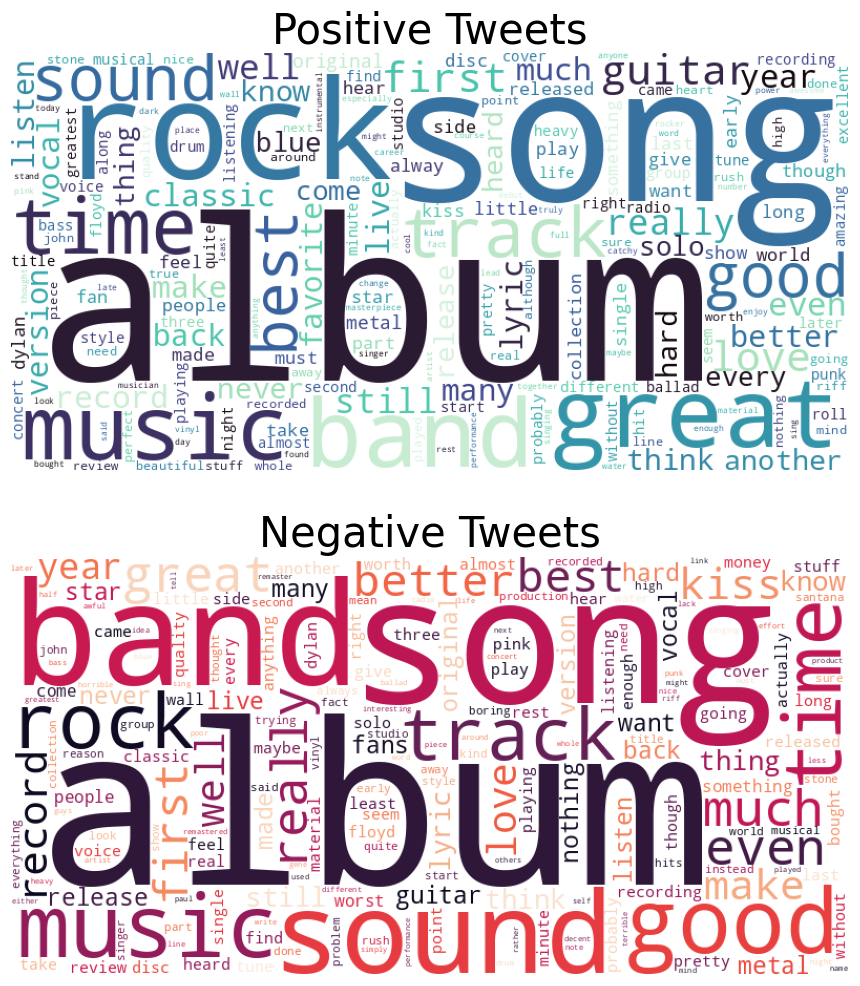

In [ ]:
# Use the package wordcloud
from wordcloud import WordCloud

# Set up the matplotlib figure
f, ax = plt.subplots(2, 1,
                     figsize=(12,12)
                     )

# Generate a word cloud for postive tweets
myCloudPos = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='mako'
                       ).generate(myStringPos)

ax[0].imshow(myCloudPos)
ax[0].set_title('Positive Tweets',fontsize=30)
ax[0].set_xlabel('')
ax[0].axis("off")

# Generate a word cloud for negtive tweets
myCloudNeg = WordCloud(random_state=9165,
                       width=800, height=400,
                       # collocations=True will include 2 words/bigrams
                       collocations=False,
                       background_color='white',
                       colormap='rocket'
                       ).generate(myStringNeg)

ax[1].imshow(myCloudNeg)
ax[1].set_title('Negative Tweets',fontsize=30)
ax[1].set_xlabel('')
ax[1].axis("off")

# Save the figure
plt.savefig('conditionalWordcloud.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

In [ ]:
myDF = pd.DataFrame(fDist.most_common(30), columns=['word', 'frequency'])

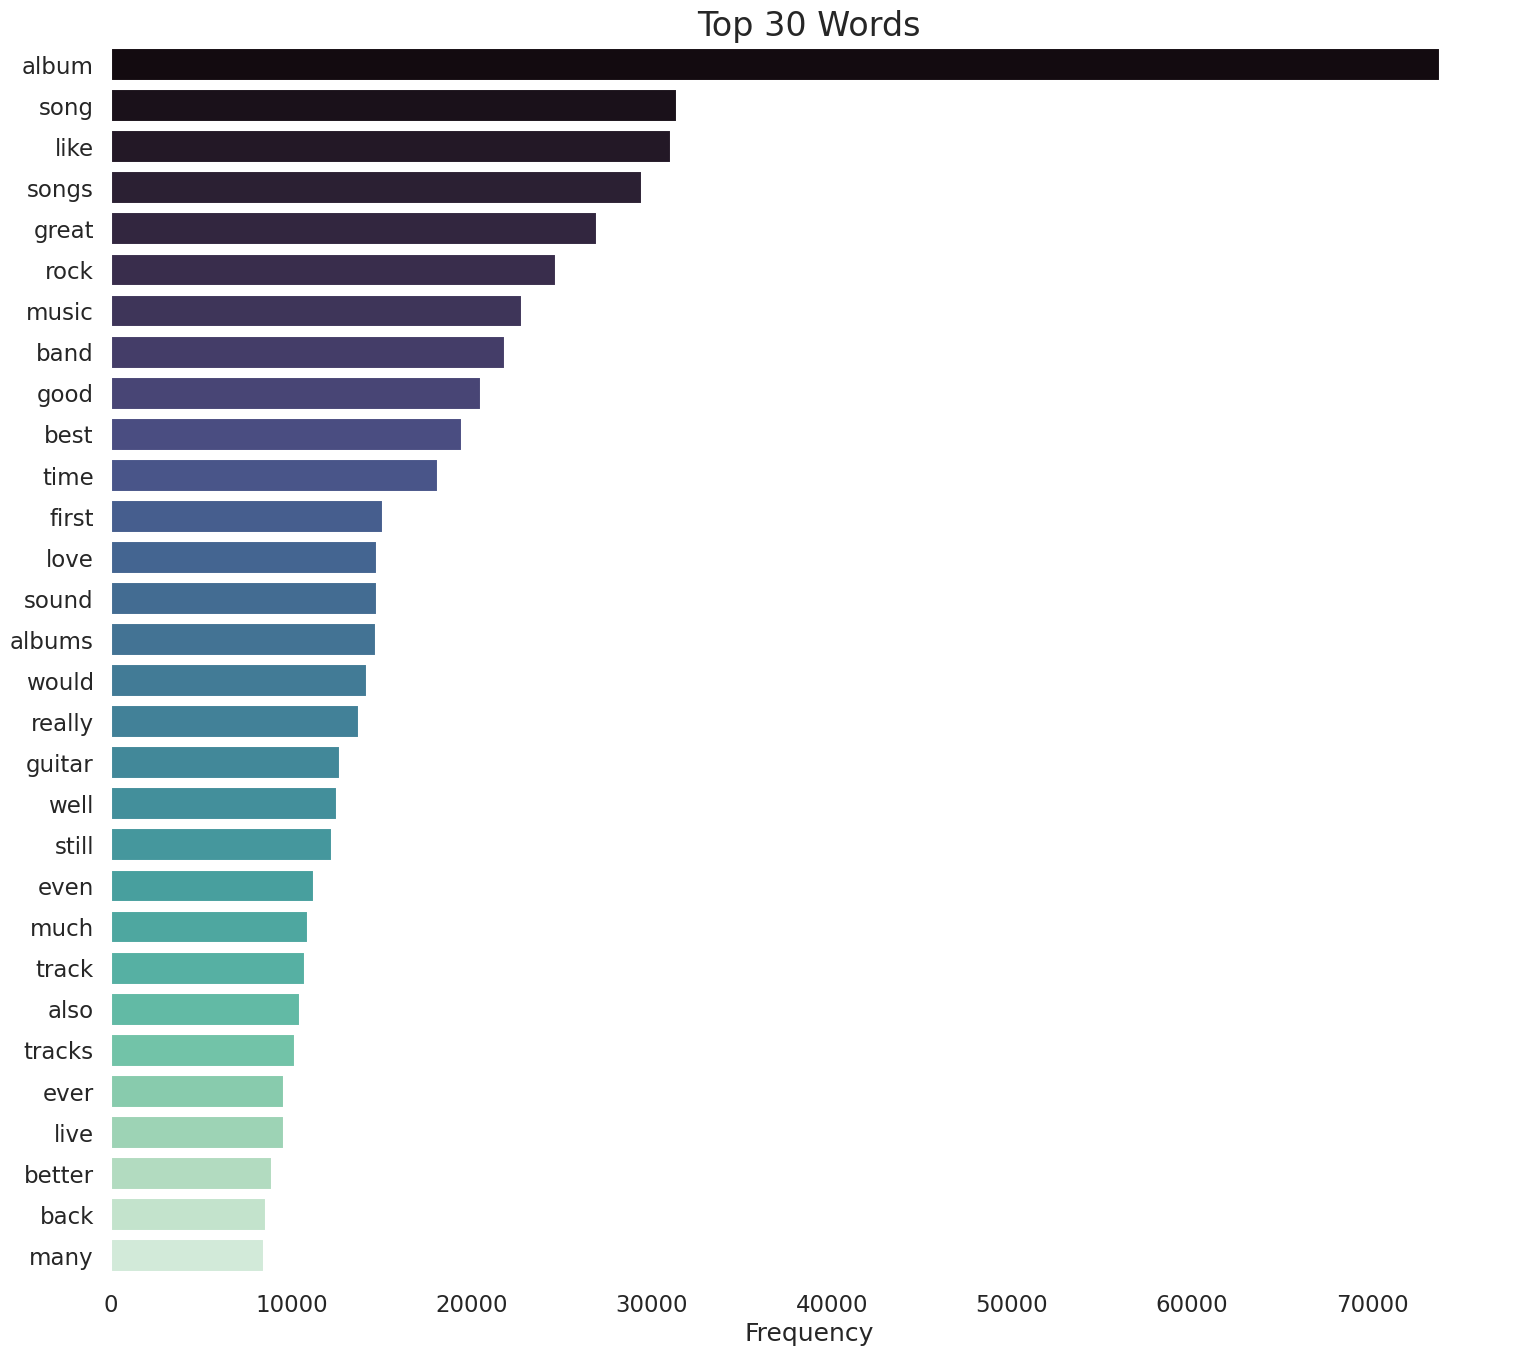

In [ ]:
# Visualise the result

# Set a more specific style
sns.set_theme(style="white", context="talk")
#sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18,16))

# x and y will control if the barplot is horizontal or vertical
sns.barplot(x="frequency",
            y="word",
            data=myDF,
            hue="word",
            palette="mako"
            )

# Add label to horiztontal axis
ax.set_xlabel("Frequency")

# Remove ylabel
ax.set_ylabel("")

# Add a title
ax.set_title("Top 30 Words", fontsize = 24)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig("top30.png",
            bbox_inches="tight",
            dpi=200)

# Show nicely in the notebook
plt.show()

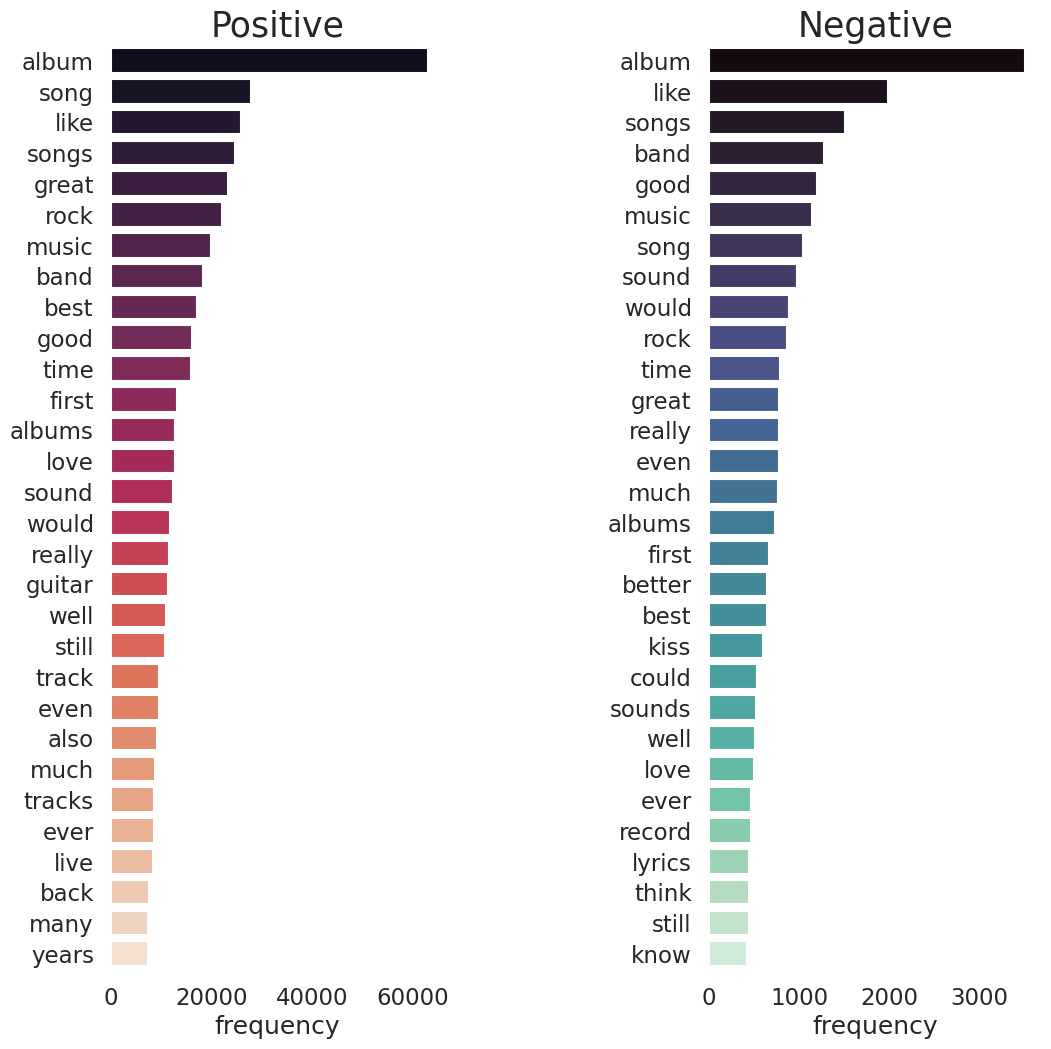

In [ ]:
# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(1, 2,
                     figsize=(12,12)
                     )

# Barplot for positive tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFPos,
            palette="rocket",
            ax=ax[0]
            )

ax[0].set_title('Positive',fontsize=25)
ax[0].set_ylabel('')

# Barplot for negative tweets
sns.barplot(x="frequency",
            y="word",
            hue="word",
            data=myDFNeg,
            palette="mako",
            ax=ax[1]
            )

ax[1].set_title('Negative',fontsize=25)
ax[1].set_ylabel('')

# Leave some space between subplots
# Try commenting it out
plt.subplots_adjust(wspace=0.8)

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
plt.savefig('conditionalWordFreq.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

In [ ]:
myTokens = [word_tokenize(tweet) for tweet in final_df_1_LongTw['clean_tw']]

# Remove stopwords and lowercase all
myTokens_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokens]

In [ ]:
# Generate lists of bigrams

myBigram = [list(bigrams(tweet)) for tweet in myTokens_noSW_noCase]

# Put all lists together

# We need itertools
import itertools

myBigramList = list(itertools.chain.from_iterable(myBigram))

In [ ]:
bigramFreq = FreqDist(myBigramList)
bigramFreq.most_common(50)

[(('rock', 'roll'), 3681),
 (('pink', 'floyd'), 2467),
 (('hard', 'rock'), 2352),
 (('sounds', 'like'), 1934),
 (('title', 'track'), 1868),
 (('great', 'album'), 1774),
 (('songs', 'like'), 1757),
 (('every', 'song'), 1584),
 (('best', 'album'), 1452),
 (('song', 'album'), 1446),
 (('first', 'album'), 1341),
 (('heavy', 'metal'), 1285),
 (('songs', 'album'), 1248),
 (('great', 'songs'), 1223),
 (('sound', 'like'), 1221),
 (('first', 'time'), 1198),
 (('greatest', 'hits'), 1192),
 (('best', 'songs'), 1161),
 (('even', 'though'), 1109),
 (('class', 'link'), 1089),
 (('data', 'hook'), 1088),
 (('hook', 'product'), 1088),
 (('product', 'link'), 1088),
 (('link', 'linked'), 1088),
 (('linked', 'class'), 1088),
 (('link', 'normal'), 1088),
 (('normal', 'href'), 1088),
 (('great', 'song'), 1043),
 (('bonus', 'tracks'), 1018),
 (('much', 'better'), 1017),
 (('guitar', 'solo'), 965),
 (('sound', 'quality'), 963),
 (('moody', 'blues'), 958),
 (('years', 'later'), 947),
 (('album', 'great'), 946)

In [ ]:
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Step 1: Import libraries and initialize stopwords
en_stopwords = set(stopwords.words('english'))

# Step 2: Tokenize the cleaned tweets
myTokens = [word_tokenize(tweet) for tweet in final_df_1_LongTw['clean_tw']]

# Step 3: Remove stopwords and lowercase all the words
myTokens_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word) > 3)] for tweet in myTokens]

# Step 4: Generate lists of bigrams
myBigram = [list(bigrams(tweet)) for tweet in myTokens_noSW_noCase]

# Step 5: Remove irrelevant bigrams
irrelevant_words = ['enough', 'even']  # Add your list of irrelevant words here
filtered_bigrams = [[bigram for bigram in tweet if not any(word in bigram for word in irrelevant_words)] for tweet in myBigram]

# Step 6: Count the frequency of remaining bigrams
bigramFreq = Counter([bigram for sublist in filtered_bigrams for bigram in sublist])

# Step 7: Visualize the most common bigrams
print(bigramFreq.most_common(50))


[(('rock', 'roll'), 3681), (('pink', 'floyd'), 2467), (('hard', 'rock'), 2352), (('sounds', 'like'), 1934), (('title', 'track'), 1868), (('great', 'album'), 1774), (('songs', 'like'), 1755), (('every', 'song'), 1584), (('song', 'album'), 1446), (('best', 'album'), 1438), (('first', 'album'), 1341), (('heavy', 'metal'), 1285), (('songs', 'album'), 1248), (('great', 'songs'), 1222), (('sound', 'like'), 1221), (('first', 'time'), 1198), (('greatest', 'hits'), 1192), (('guitar', 'work'), 1160), (('best', 'songs'), 1158), (('class', 'link'), 1089), (('data', 'hook'), 1088), (('hook', 'product'), 1088), (('product', 'link'), 1088), (('link', 'linked'), 1088), (('linked', 'class'), 1088), (('link', 'normal'), 1088), (('normal', 'href'), 1088), (('great', 'song'), 1043), (('bonus', 'tracks'), 1018), (('much', 'better'), 1017), (('guitar', 'solo'), 965), (('sound', 'quality'), 963), (('moody', 'blues'), 958), (('years', 'later'), 947), (('album', 'great'), 946), (('good', 'album'), 941), (('cla

In [ ]:
# Prepare the bigram network

# We need some viz tools
!sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
!sudo pip install pygraphviz

# We need networkx
import networkx as nx
import matplotlib.pyplot as plt

# For positive reviews

# Collect the result
myResultPos = bigramFreqPos.most_common(50)
# Construct the network
G_pos = nx.DiGraph()
# Create connections between nodes
for i in myResultPos:
    G_pos.add_edge(i[0][0], i[0][1], weight=(i[1]))

# For negative reviews

# Collect the result
myResultNeg = bigramFreqNeg.most_common(50)
# Construct the network
G_neg = nx.DiGraph()
# Create connections between nodes
for i in myResultNeg:
    G_neg.add_edge(i[0][0], i[0][1], weight=(i[1]))

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
python3-dev is already the newest version (3.10.6-1~22.04).
python3-dev set to manually installed.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/m

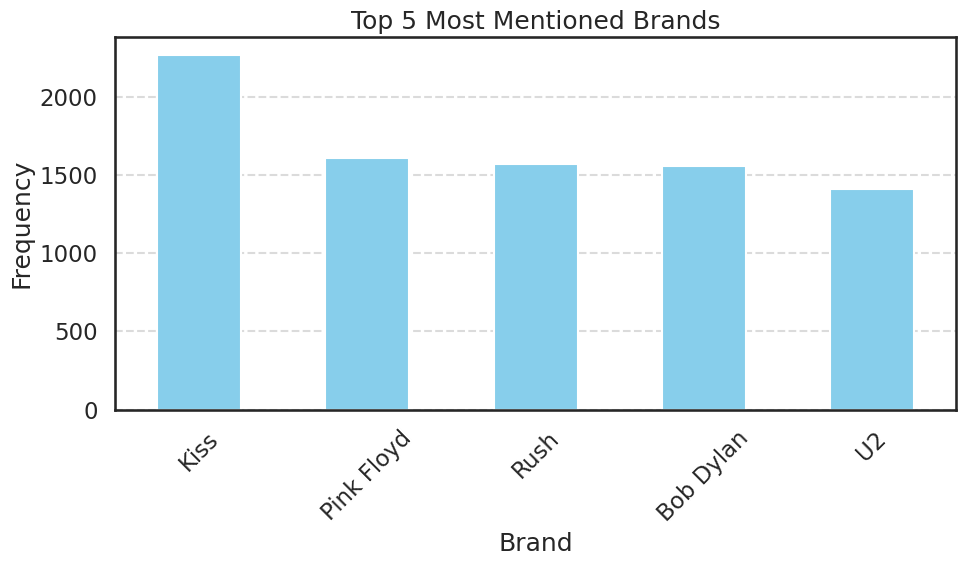

In [ ]:
brand_counts = final_df_1['brand'].value_counts()

# Step 2: Select the top 5 most mentioned brands
top_5_brands = brand_counts.head(5)

# Step 3: Plot a histogram
plt.figure(figsize=(10, 6))
top_5_brands.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Mentioned Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

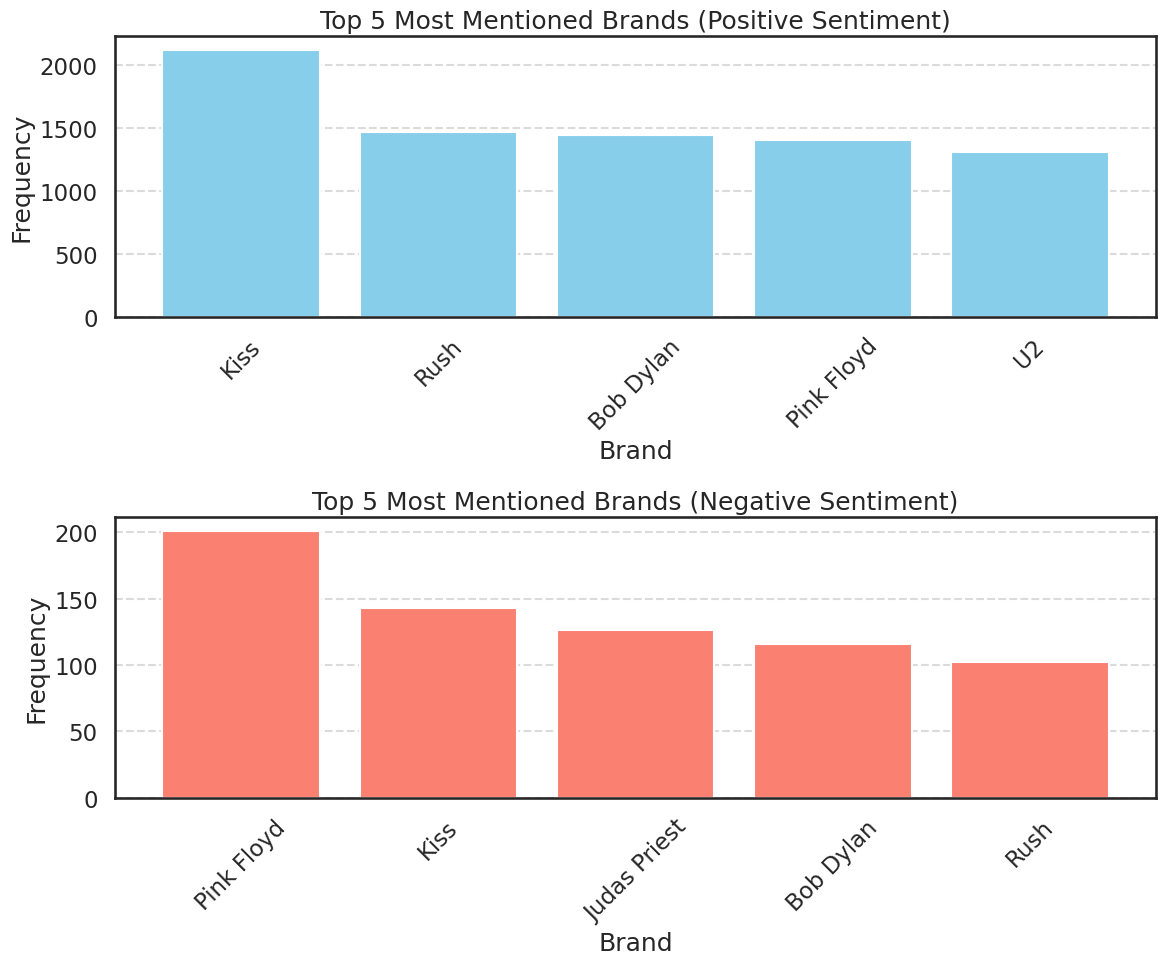

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the sentiment categories are stored in the 'sentiment_cat' column

# Filter DataFrame for positive sentiment
positive_df = final_df_1[final_df_1['sentiment_cat'] == 'positive']

# Filter DataFrame for negative sentiment
negative_df = final_df_1[final_df_1['sentiment_cat'] == 'negative']

# Count occurrences of each brand for positive sentiment
positive_brand_counts = positive_df['brand'].value_counts().head(5)

# Count occurrences of each brand for negative sentiment
negative_brand_counts = negative_df['brand'].value_counts().head(5)

# Plot histograms for positive and negative sentiments
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot histogram for positive sentiment
axs[0].bar(positive_brand_counts.index, positive_brand_counts.values, color='skyblue')
axs[0].set_title('Top 5 Most Mentioned Brands (Positive Sentiment)')
axs[0].set_xlabel('Brand')
axs[0].set_ylabel('Frequency')
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot histogram for negative sentiment
axs[1].bar(negative_brand_counts.index, negative_brand_counts.values, color='salmon')
axs[1].set_title('Top 5 Most Mentioned Brands (Negative Sentiment)')
axs[1].set_xlabel('Brand')
axs[1].set_ylabel('Frequency')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Assuming the sentiment categories are stored in the 'sentiment_cat' column
# and the date information is in the 'reviewTime' column

# Extract year from 'reviewTime'
final_df_1['Year'] = pd.to_datetime(final_df_1['reviewTime']).dt.year

# Filter DataFrame for positive sentiment
positive_df = final_df_1[final_df_1['sentiment_cat'] == 'positive']

# Filter DataFrame for negative sentiment
negative_df = final_df_1[final_df_1['sentiment_cat'] == 'negative']

# Count occurrences of each brand for positive sentiment
positive_brand_counts = positive_df.groupby(['Year', 'brand']).size().unstack().fillna(0).astype(int)

# Count occurrences of each brand for negative sentiment
negative_brand_counts = negative_df.groupby(['Year', 'brand']).size().unstack().fillna(0).astype(int)

# Find the most mentioned year for each brand for positive sentiment
positive_most_mentioned_years = positive_brand_counts.idxmax()

# Find the count of the most mentioned year for each brand for positive sentiment
positive_most_mentioned_counts = positive_brand_counts.max()

# Find the most mentioned year for each brand for negative sentiment
negative_most_mentioned_years = negative_brand_counts.idxmax()

# Find the count of the most mentioned year for each brand for negative sentiment
negative_most_mentioned_counts = negative_brand_counts.max()

# Combine the results into a DataFrame
positive_results = pd.DataFrame({'Most_Mentioned_Year': positive_most_mentioned_years, 'Count': positive_most_mentioned_counts})
negative_results = pd.DataFrame({'Most_Mentioned_Year': negative_most_mentioned_years, 'Count': negative_most_mentioned_counts})

print("Most mentioned years for positive sentiment:")
print(positive_results)

print("\nMost mentioned years for negative sentiment:")
print(negative_results)


Most mentioned years for positive sentiment:
                   Most_Mentioned_Year  Count
brand                                        
                                  2002     15
'Til Tuesday                      2014      6
10cc                              2000      7
6ths                              2000      3
ABC                               2005      9
...                                ...    ...
Yesterday & Today                 2008      2
Yngwie Malmsteen                  2000     24
Yoko Ono                          2005     11
Youngbloods                       2014      4
Zebra                             2007      4

[627 rows x 2 columns]

Most mentioned years for negative sentiment:
                  Most_Mentioned_Year  Count
brand                                       
                                 2005      3
'Til Tuesday                     2001      1
10cc                             2009      1
ABC                              2001      1
Acid Bath        

In [ ]:
# Convert reviewTime to datetime
final_df_1['reviewTime'] = pd.to_datetime(final_df_1['reviewTime'])

# Extract year from reviewTime
final_df_1['year'] = final_df_1['reviewTime'].dt.year

# Filter dataframe for positive sentiment
positive_df = final_df_1[final_df_1['sentiment'] == 'positive']

# Filter dataframe for negative sentiment
negative_df = final_df_1[final_df_1['sentiment'] == 'negative']

# Get counts of positive mentions for each brand per year
positive_brand_counts_per_year = positive_df.groupby(['year', 'brand']).size().unstack(fill_value=0)

# Get counts of negative mentions for each brand per year
negative_brand_counts_per_year = negative_df.groupby(['year', 'brand']).size().unstack(fill_value=0)

print("Positive brand counts per year:")
print(positive_brand_counts_per_year)

print("\nNegative brand counts per year:")
print(negative_brand_counts_per_year)


Positive brand counts per year:
brand      'Til Tuesday  10cc  6ths  ABC  Ace  Acid Bath  Adam & The Ants  \
year                                                                        
1998    0             0     0     1    0    0          0                0   
1999    3             0     0     0    0    0          1                0   
2000   10             1     6     3    5    0          6                2   
2001    8             3     0     0    0    0          0                1   
2002   11             1     4     1    0    0          6                2   
2003    8             0     3     0    2    0          4                0   
2004   10             0     2     0    0    0          9                0   
2005   13             0     5     0    9    1          7                2   
2006    4             0     1     0    2    0          4                2   
2007    7             0     3     0    0    0          1                0   
2008    7             0     2     0    2    

In [ ]:
# Total mentioned counts (positive and negative) for each brand per year
total_mentioned_counts_per_year = positive_brand_counts_per_year.add(negative_brand_counts_per_year, fill_value=0)

# Get the top 5 brands per year based on total mentioned counts
top_5_brands_per_year = {}
for year in total_mentioned_counts_per_year.index:
    top_5_brands_per_year[year] = total_mentioned_counts_per_year.loc[year].nlargest(5)

print("Top 5 brands mentioned per year:")
for year, top_5_brands in top_5_brands_per_year.items():
    print(f"\nYear {year}:")
    print(top_5_brands)


Top 5 brands mentioned per year:

Year 1998:
brand
Kiss          14.0
U2            11.0
Bob Dylan      7.0
Pink Floyd     7.0
Billy Joel     6.0
Name: 1998, dtype: float64

Year 1999:
brand
U2                                           37.0
Bob Dylan                                    25.0
Dc Talk              Cdchmg        46526B    23.0
Judas Priest                                 23.0
Def Leppard                                  22.0
Name: 1999, dtype: float64

Year 2000:
brand
Pink Floyd      117.0
Bob Dylan       110.0
Kiss             99.0
U2               90.0
Donald Fagen     86.0
Name: 2000, dtype: float64

Year 2001:
brand
U2            113.0
Kiss           78.0
Bob Dylan      76.0
Rush           63.0
Pink Floyd     61.0
Name: 2001, dtype: float64

Year 2002:
brand
U2            94.0
Kiss          89.0
Pink Floyd    77.0
Rush          73.0
Bob Dylan     58.0
Name: 2002, dtype: float64

Year 2003:
brand
Pink Floyd    78.0
Kiss          76.0
U2            64.0
Bob Dylan     63.

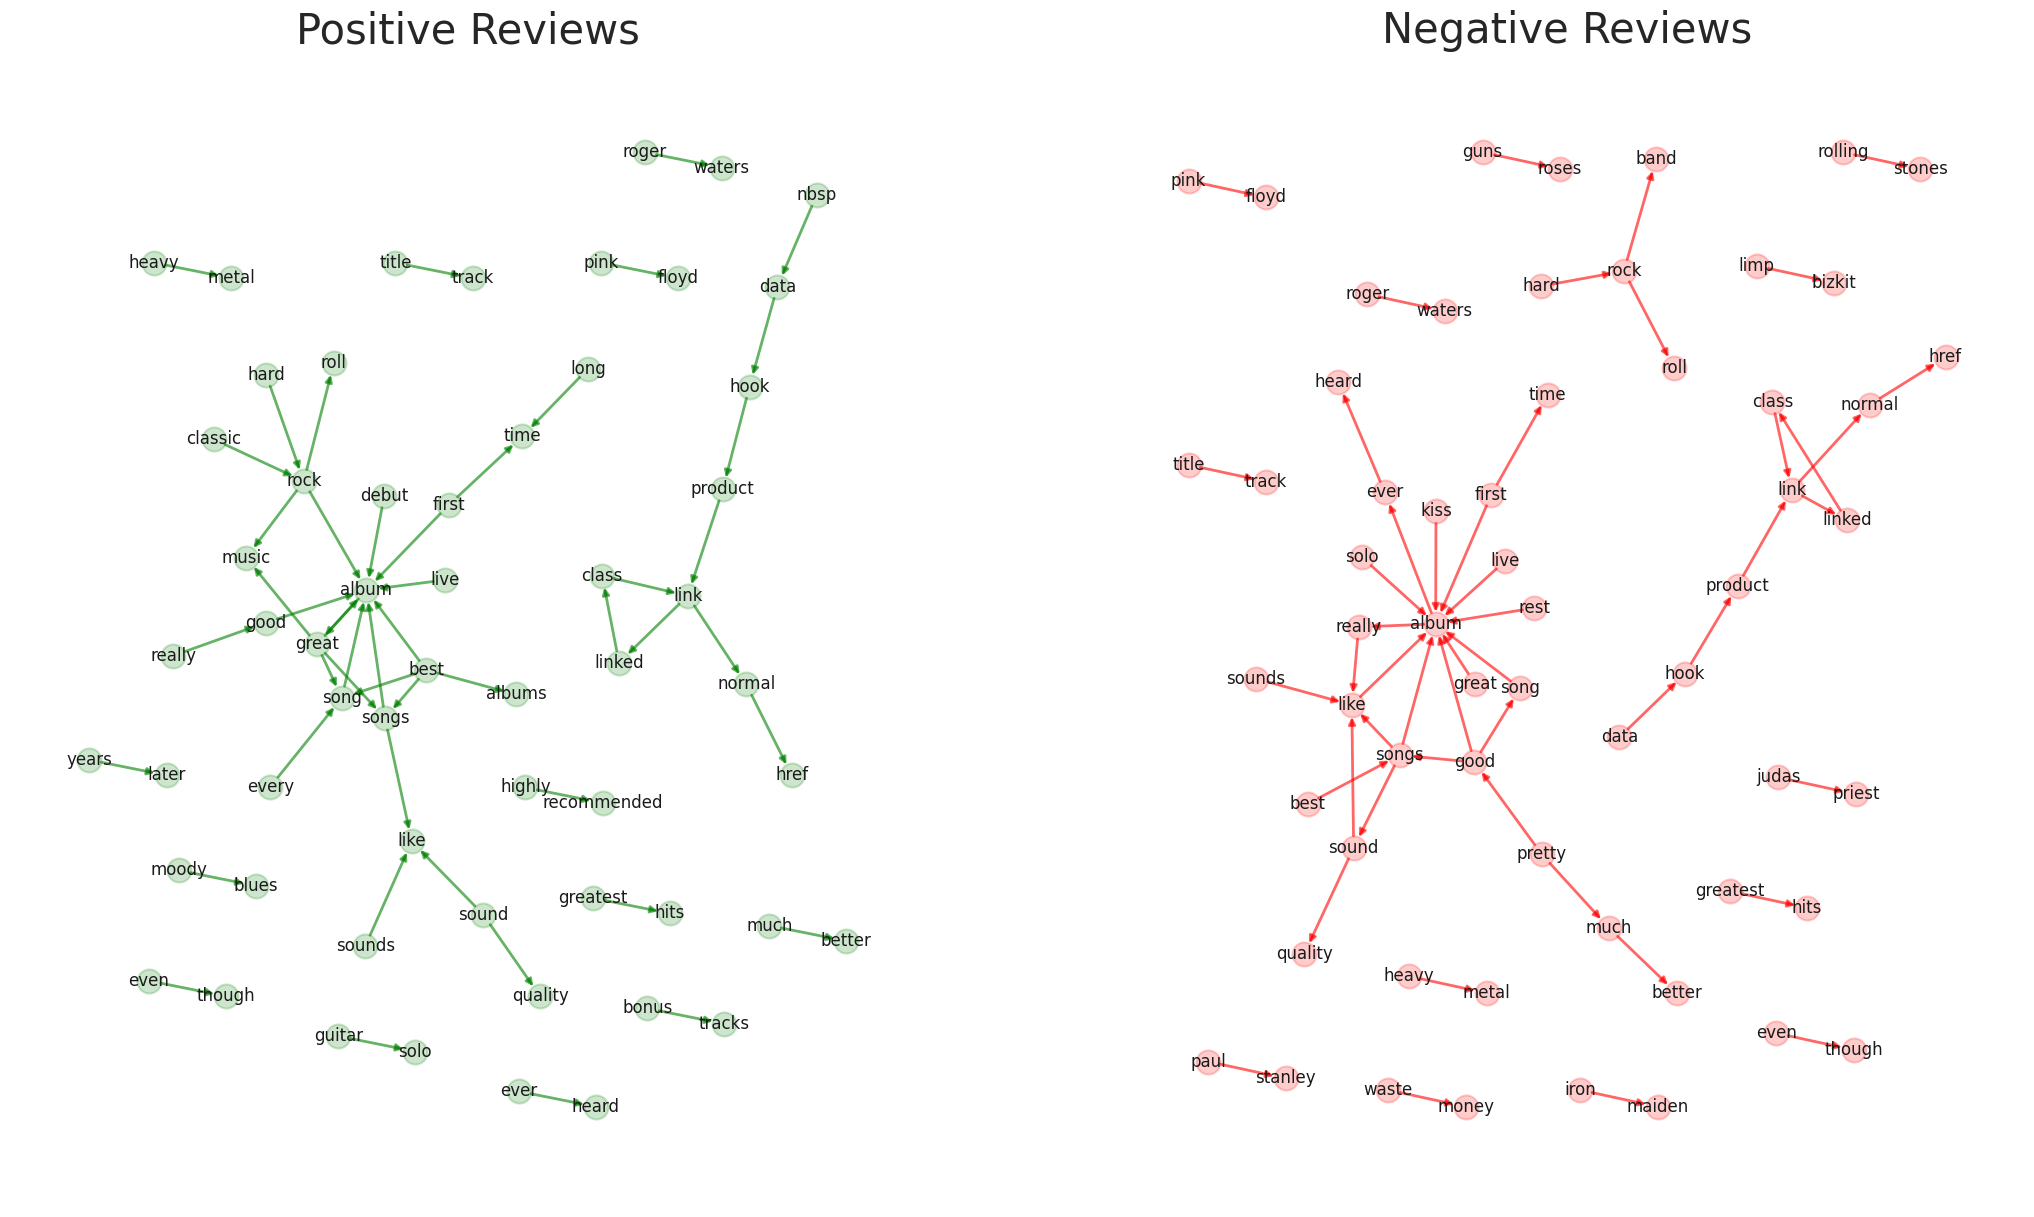

In [ ]:
# Visualisation

import seaborn as sns

# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = nx.nx_agraph.graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green",ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews',fontsize=30)

# For negative subplot

# use another layout
pos_neg = nx.nx_agraph.graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red",ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg)

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews',fontsize=30)

# Save the figure
plt.savefig('PBigram.png',
            bbox_inches='tight',
            dpi=700)

# Show nicely in the notebook
plt.show()

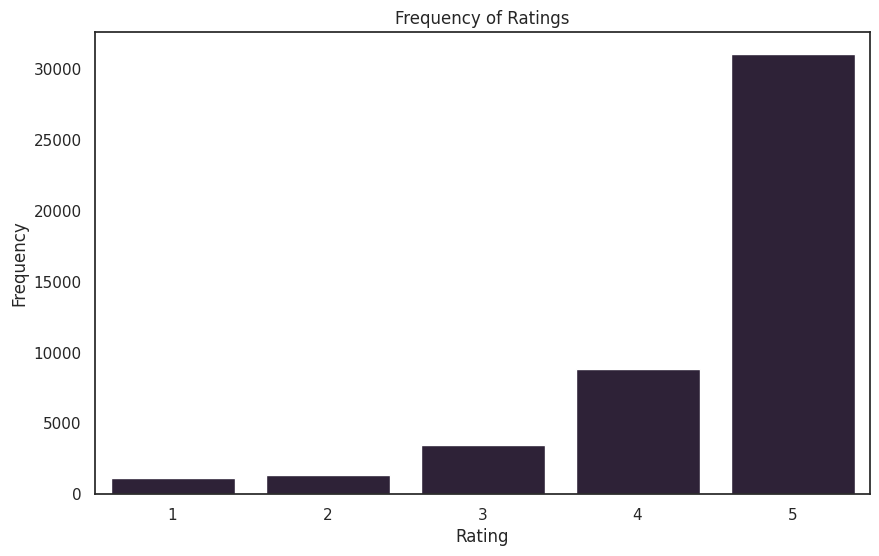

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn theme and palette
sns.set_theme(style="white", palette="mako")

# Plot the frequency of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=final_df_1, x='overall')
plt.title('Frequency of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
final_df_1

,asin,reviewText,overall,reviewTime,description,brand,price,category_split,clean_tw,sentiment_score,sentiment_cat,sentiment
0,0788602144,"The answer, of course, is no. A lot of time ha...",4,"07 8, 2002","[""Hullabaloo"" featured the most popular rock '...",Patrick Adiarte,,Classic Rock,The answer of course is no A lot of time ha...,0.8020,positive,positive
1,0788602144,"I initially bought Vol 3 on VHS, because I'd n...",5,"05 15, 2002","[""Hullabaloo"" featured the most popular rock '...",Patrick Adiarte,,Classic Rock,I initially bought Vol on VHS because I'd n...,0.8608,positive,positive
2,0788602144,I'm probably dead center in the target age ran...,4,"10 19, 2000","[""Hullabaloo"" featured the most popular rock '...",Patrick Adiarte,,Classic Rock,I'm probably dead center in the target age ran...,0.9828,positive,positive
3,1566054109,"I was newly sixteen when Pat did this concert,...",4,"04 17, 2000",[Rock-n-roll maven Pat Benatar performs live i...,Pat Benatar,,Classic Rock,I was newly sixteen when Pat did this concert ...,0.9908,positive,positive
4,1566054109,"I'm not really a big Pat Benatar fan, but I ca...",4,"02 11, 2000",[Rock-n-roll maven Pat Benatar performs live i...,Pat Benatar,,Classic Rock,I'm not really a big Pat Benatar fan but I ca...,0.9407,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
45956,B0000025VU,Bob Dylan is the song writer with chameleon DN...,5,"01 30, 2013",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,Bob Dylan is the song writer with chameleon DN...,0.0972,positive,positive
45957,B0000025VU,"If you are a Dylan fan, this is a must have. ...",5,"11 23, 2012",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,If you are a Dylan fan this is a must have ...,0.7269,positive,positive
45958,B0000025VU,He never disappoints-even my 19 year old son a...,5,"11 23, 2012",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,He never disappoints even my year old son a...,0.5972,positive,positive
45959,B0000025VU,I like all of hsi music...some a little more o...,5,"09 30, 2012",[bob dylan infidels 2004 USA red columbia logo...,Bob Dylan,$2.99,Classic Rock,I like all of hsi music some a little more o...,0.6808,positive,positive


In [ ]:
final_df_1.dtypes

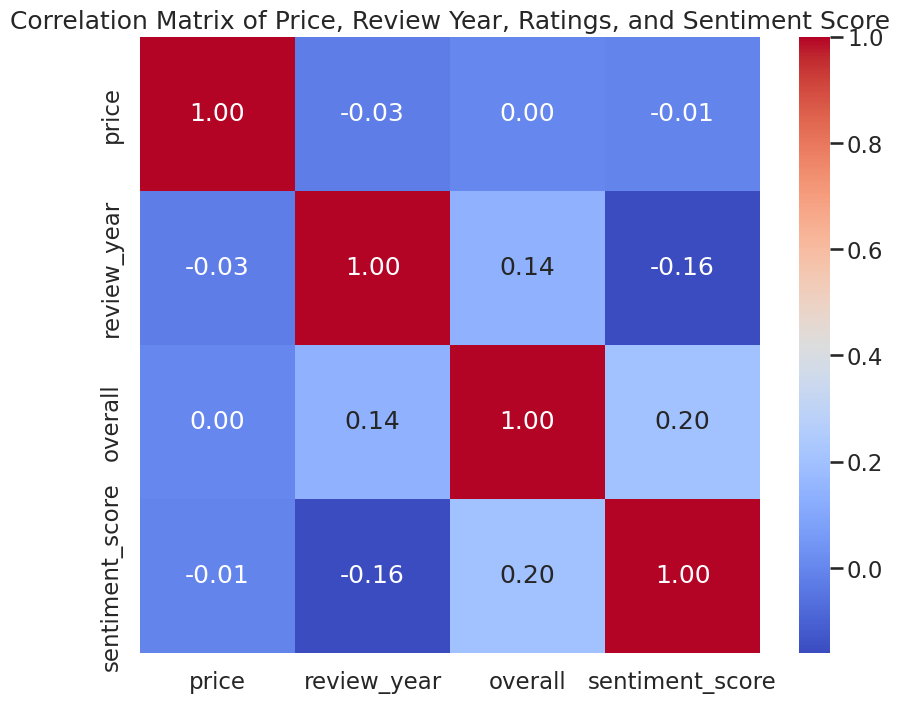

                     price                 overall
                   overall sentiment_score overall
category_split                                    
Alternative Rock -0.004802        0.021902     1.0
Classic Rock      0.027125       -0.003373     1.0
Rock             -0.013707       -0.021732     1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'reviewTime' to datetime if it's not already
final_df_1['reviewTime'] = pd.to_datetime(final_df_1['reviewTime'], errors='coerce')

# Extract year from reviewTime to analyze impact over different time periods
final_df_1['review_year'] = final_df_1['reviewTime'].dt.year

# Ensure 'price' is in a proper numeric format, convert and handle errors if any
final_df_1['price'] = pd.to_numeric(final_df_1['price'].str.replace('$', '').replace(',', ''), errors='coerce')

# Drop rows with missing values in 'price', 'review_year', and 'overall' for correlation analysis
analysis_df = final_df_1.dropna(subset=['price', 'review_year', 'overall', 'sentiment_score'])

# Calculate the correlation matrix for numeric variables
correlation_matrix = analysis_df[['price', 'review_year', 'overall', 'sentiment_score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Price, Review Year, Ratings, and Sentiment Score')
plt.show()

# To analyze correlations by 'category_split'
category_correlations = analysis_df.groupby('category_split')[['price', 'overall', 'sentiment_score']].corr().unstack().iloc[:,[1, 2, 4]]
print(category_correlations)

# This will show correlation between price and ratings, price and sentiment score for each category

